# Práctica 1 

## Jaime Ballesteros Calvo y Nicolás Benjamín Lamotte Fresno

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
wind_ava = pd.read_csv('wind_ava.csv.gz', compression="gzip")

## EDA simplificado

A continuación, vamos a observar los datos que vamos a utilizar para la realización de la práctica

In [3]:
wind_ava.columns

Index(['datetime', 'energy', 'p54.162.1', 'p54.162.2', 'p54.162.3',
       'p54.162.4', 'p54.162.5', 'p54.162.6', 'p54.162.7', 'p54.162.8',
       ...
       'v100.16', 'v100.17', 'v100.18', 'v100.19', 'v100.20', 'v100.21',
       'v100.22', 'v100.23', 'v100.24', 'v100.25'],
      dtype='object', length=552)

In [4]:
wind_ava

,datetime,energy,p54.162.1,p54.162.2,p54.162.3,p54.162.4,p54.162.5,p54.162.6,p54.162.7,p54.162.8,...,v100.16,v100.17,v100.18,v100.19,v100.20,v100.21,v100.22,v100.23,v100.24,v100.25
0,2005-01-02 18:00:00,402.71,2.534970e+06,2.526864e+06,2.518754e+06,2.510648e+06,2.502537e+06,2.531111e+06,2.522721e+06,2.514330e+06,...,-4.683596,-4.545396,-4.407196,-4.268996,-4.131295,-4.669626,-4.528932,-4.388736,-4.248540,-4.107846
1,2005-01-03 00:00:00,696.80,2.537369e+06,2.529277e+06,2.521184e+06,2.513088e+06,2.504995e+06,2.533465e+06,2.525088e+06,2.516716e+06,...,-3.397886,-3.257192,-3.115998,-2.975304,-2.834609,-3.396390,-3.254198,-3.112506,-2.970314,-2.828622
2,2005-01-03 06:00:00,1591.15,2.533727e+06,2.525703e+06,2.517678e+06,2.509654e+06,2.501629e+06,2.529801e+06,2.521496e+06,2.513187e+06,...,-1.454105,-1.296447,-1.138290,-0.980134,-0.822476,-1.459094,-1.302933,-1.147271,-0.991110,-0.834949
3,2005-01-03 12:00:00,1338.62,2.534491e+06,2.526548e+06,2.518609e+06,2.510670e+06,2.502732e+06,2.530569e+06,2.522346e+06,2.514127e+06,...,1.255015,1.370265,1.485515,1.600765,1.716015,1.210612,1.319376,1.428140,1.536405,1.645169
4,2005-01-03 18:00:00,562.50,2.529543e+06,2.521623e+06,2.513702e+06,2.505782e+06,2.497861e+06,2.525621e+06,2.517421e+06,2.509215e+06,...,1.939031,2.023847,2.108663,2.193977,2.278793,1.873673,1.953000,2.031829,2.111157,2.189986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4743,2009-12-30 06:00:00,1280.13,2.407224e+06,2.400131e+06,2.393033e+06,2.385939e+06,2.378841e+06,2.403709e+06,2.396344e+06,2.388984e+06,...,9.377886,9.271118,9.164849,9.058080,8.951312,9.402832,9.291075,9.179816,9.068059,8.956800
4744,2009-12-30 12:00:00,855.00,2.407234e+06,2.400117e+06,2.393001e+06,2.385885e+06,2.378768e+06,2.403700e+06,2.396317e+06,2.388935e+06,...,7.345796,7.500461,7.655624,7.810288,7.964953,7.457055,7.604734,7.751915,7.899595,8.047274
4745,2009-12-30 18:00:00,117.06,2.401034e+06,2.393683e+06,2.386332e+06,2.378981e+06,2.371630e+06,2.397510e+06,2.389888e+06,2.382270e+06,...,3.485674,3.535566,3.585458,3.635349,3.685241,3.505132,3.552030,3.598429,3.645328,3.691727
4746,2009-12-31 12:00:00,516.96,2.393873e+06,2.386499e+06,2.379125e+06,2.371752e+06,2.364378e+06,2.390276e+06,2.382632e+06,2.374982e+06,...,1.988424,2.123630,2.258837,2.394043,2.529749,1.960983,2.094194,2.226906,2.360117,2.492829


Primeramente, hay que tratar a la columna datatime de manera distinta, ya que la vamos a tratar como un índice, ya que así va a ser más fácil de manipular los datos de la práctica y asi considera el tiempo como una variable

In [5]:
wind_ava = wind_ava.set_index('datetime')

In [6]:
wind_ava.index = pd.to_datetime(wind_ava.index)

In [7]:
wind_ava

,energy,p54.162.1,p54.162.2,p54.162.3,p54.162.4,p54.162.5,p54.162.6,p54.162.7,p54.162.8,p54.162.9,...,v100.16,v100.17,v100.18,v100.19,v100.20,v100.21,v100.22,v100.23,v100.24,v100.25
datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 18:00:00,402.71,2.534970e+06,2.526864e+06,2.518754e+06,2.510648e+06,2.502537e+06,2.531111e+06,2.522721e+06,2.514330e+06,2.505940e+06,...,-4.683596,-4.545396,-4.407196,-4.268996,-4.131295,-4.669626,-4.528932,-4.388736,-4.248540,-4.107846
2005-01-03 00:00:00,696.80,2.537369e+06,2.529277e+06,2.521184e+06,2.513088e+06,2.504995e+06,2.533465e+06,2.525088e+06,2.516716e+06,2.508339e+06,...,-3.397886,-3.257192,-3.115998,-2.975304,-2.834609,-3.396390,-3.254198,-3.112506,-2.970314,-2.828622
2005-01-03 06:00:00,1591.15,2.533727e+06,2.525703e+06,2.517678e+06,2.509654e+06,2.501629e+06,2.529801e+06,2.521496e+06,2.513187e+06,2.504882e+06,...,-1.454105,-1.296447,-1.138290,-0.980134,-0.822476,-1.459094,-1.302933,-1.147271,-0.991110,-0.834949
2005-01-03 12:00:00,1338.62,2.534491e+06,2.526548e+06,2.518609e+06,2.510670e+06,2.502732e+06,2.530569e+06,2.522346e+06,2.514127e+06,2.505904e+06,...,1.255015,1.370265,1.485515,1.600765,1.716015,1.210612,1.319376,1.428140,1.536405,1.645169
2005-01-03 18:00:00,562.50,2.529543e+06,2.521623e+06,2.513702e+06,2.505782e+06,2.497861e+06,2.525621e+06,2.517421e+06,2.509215e+06,2.501015e+06,...,1.939031,2.023847,2.108663,2.193977,2.278793,1.873673,1.953000,2.031829,2.111157,2.189986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-12-30 06:00:00,1280.13,2.407224e+06,2.400131e+06,2.393033e+06,2.385939e+06,2.378841e+06,2.403709e+06,2.396344e+06,2.388984e+06,2.381615e+06,...,9.377886,9.271118,9.164849,9.058080,8.951312,9.402832,9.291075,9.179816,9.068059,8.956800
2009-12-30 12:00:00,855.00,2.407234e+06,2.400117e+06,2.393001e+06,2.385885e+06,2.378768e+06,2.403700e+06,2.396317e+06,2.388935e+06,2.381552e+06,...,7.345796,7.500461,7.655624,7.810288,7.964953,7.457055,7.604734,7.751915,7.899595,8.047274
2009-12-30 18:00:00,117.06,2.401034e+06,2.393683e+06,2.386332e+06,2.378981e+06,2.371630e+06,2.397510e+06,2.389888e+06,2.382270e+06,2.374648e+06,...,3.485674,3.535566,3.585458,3.635349,3.685241,3.505132,3.552030,3.598429,3.645328,3.691727


<Axes: xlabel='datetime'>

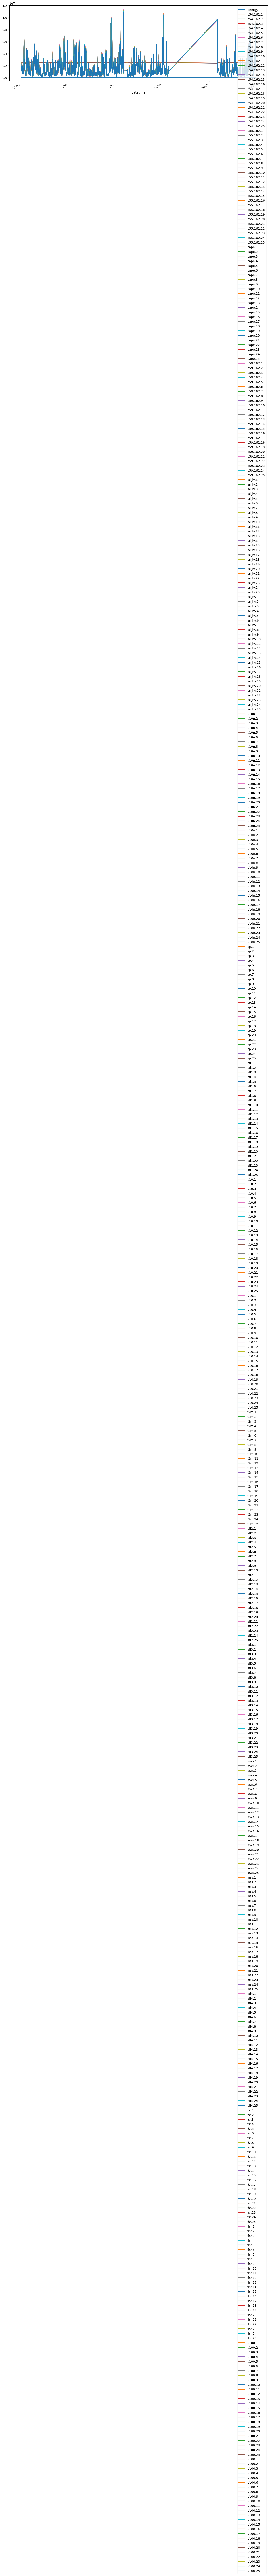

In [8]:
wind_ava.plot(figsize=(15, 5))

Con esto se puede observar todos los distintos datos que hay en los datos que vamos a utilizar. Estos son 22 datos meteorlógicos los cuales son las variables, que a su vez tienen una cuadrícula de 5x5 que representan a las 25 localizaciones. Para esta práctica, solo se van a utilizar las de la localización 13.

In [9]:
for c in wind_ava.columns:
    if not c.endswith('.13') and c != 'energy':
        wind_ava.drop(c, axis = 1, inplace=True)

In [10]:
wind_ava

,energy,p54.162.13,p55.162.13,cape.13,p59.162.13,lai_lv.13,lai_hv.13,u10n.13,v10n.13,sp.13,...,t2m.13,stl2.13,stl3.13,iews.13,inss.13,stl4.13,fsr.13,flsr.13,u100.13,v100.13
datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 18:00:00,402.71,2.510824e+06,9.186295,13.527577,1.386937e+06,2.344111,2.432983,-0.757587,-1.922799,99846.319914,...,280.473098,281.042026,281.462478,-0.057958,-0.138650,284.684755,0.404731,-5.927092,-1.780562,-4.443617
2005-01-03 00:00:00,696.80,2.513173e+06,8.849569,6.896412,1.153526e+06,2.343719,2.432838,-1.412620,-1.403011,99917.733093,...,278.286616,280.747406,281.486541,-0.103576,-0.083050,284.667948,0.404920,-5.913881,-3.743344,-3.129469
2005-01-03 06:00:00,1591.15,2.509627e+06,7.924080,4.774439,1.098754e+06,2.343300,2.432704,-2.290185,-0.754580,99764.378681,...,277.206490,280.114863,281.487095,-0.165721,-0.036241,284.651914,0.405704,-5.908272,-5.097203,-1.157748
2005-01-03 12:00:00,1338.62,2.510571e+06,6.922709,0.000000,1.076021e+06,2.342830,2.432514,-3.497855,1.271028,99672.670459,...,280.926600,279.991138,281.472435,-0.275550,0.098192,284.636266,0.403967,-5.961995,-4.500835,1.502478
2005-01-03 18:00:00,562.50,2.505664e+06,6.646282,0.000000,1.070830e+06,2.342437,2.432369,-0.971249,0.553060,99372.811211,...,277.363875,280.576898,281.473265,-0.056553,0.041844,284.620232,0.403808,-5.987860,-3.392324,2.131114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-12-30 06:00:00,1280.13,2.385772e+06,14.413342,24.971074,3.905586e+06,2.349839,2.434994,4.595786,5.563189,95460.434452,...,280.731326,282.643490,281.676560,0.628948,0.879581,286.013271,0.424510,-5.715421,6.922743,9.179816
2009-12-30 12:00:00,855.00,2.385708e+06,12.802883,60.248874,2.745694e+06,2.349446,2.434849,4.894838,5.577096,95663.765406,...,283.310687,282.370909,281.761750,0.740926,0.699769,285.988737,0.424762,-5.732455,7.434887,7.537381
2009-12-30 18:00:00,117.06,2.379049e+06,10.915997,3.145067,2.254171e+06,2.349054,2.434715,0.958361,0.948029,95653.110509,...,281.060085,282.425812,281.841961,0.109802,0.125174,285.968452,0.415132,-5.866856,3.033799,3.568993


### Naturaleza de las variables y tipo de problema

#### Tras esto, se pueden responder a varias preguntas que se proponen en el enunciado. Las variables que vamos a utilizar son de tipo numérico. Además, con esto se puede observar que se trata de un problema de regresión, ya que el objetivo final de esta práctica es predecir ciertos valores de la variable energía. 

Tras esto, vamos a empezar la limpieza de los datos fijandonos en cómo nos los han dado

<Axes: xlabel='datetime'>

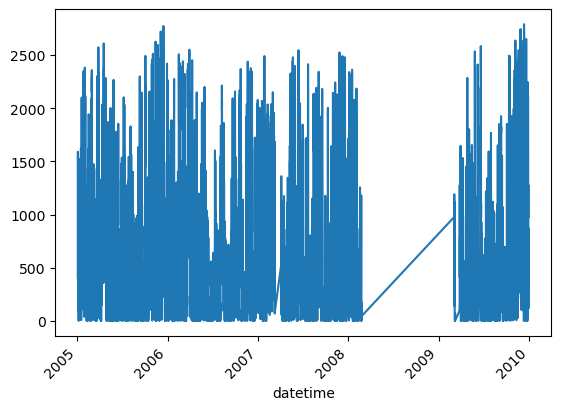

In [11]:
wind_ava['energy'].plot(rot=45)

Al observar esto, se observa que hay un salto entre el año 2008 y 2009, por lo que vamos a observar cuando se produce esa perdida de datos para poder saber que hacer con ellos


In [15]:
instances_per_day = wind_ava.resample('D').size()

In [16]:
time_diff = wind_ava.index.to_series().diff().dt.days

In [17]:
time_diff

datetime
2005-01-02 18:00:00    NaN
2005-01-03 00:00:00    0.0
2005-01-03 06:00:00    0.0
2005-01-03 12:00:00    0.0
2005-01-03 18:00:00    0.0
                      ... 
2009-12-30 06:00:00    0.0
2009-12-30 12:00:00    0.0
2009-12-30 18:00:00    0.0
2009-12-31 12:00:00    0.0
2009-12-31 18:00:00    0.0
Name: datetime, Length: 4748, dtype: float64

In [18]:
missing_days = time_diff[time_diff > 1]

In [19]:
missing_days

datetime
2006-01-23 12:00:00      3.0
2007-04-04 18:00:00     24.0
2007-09-28 18:00:00      3.0
2007-12-31 12:00:00      2.0
2008-02-12 00:00:00      2.0
2009-03-05 12:00:00    373.0
2009-03-26 18:00:00     17.0
2009-06-19 12:00:00      8.0
2009-08-17 18:00:00      2.0
2009-09-27 00:00:00      2.0
2009-09-29 12:00:00      2.0
Name: datetime, dtype: float64